In [5]:
import pandas as pd
import numpy as np

# Read the ResistivityLOGforall4model.csv file into a DataFrame
resistivity_data = pd.read_csv('ResistivityLOGforall4model.csv')

# Select specific columns from the DataFrame
selected_columns = resistivity_data.iloc[:, [0, 1, 2, 3, 10]]

# Data columns limited to 1 entry online(Restricted Data)
print(selected_columns.head(1))

# Split the data into features (x) and target variable (y)
x = selected_columns.iloc[:, :-1].values
y = selected_columns.iloc[:, -1].values


   Electric Field  Aging Temp  Testing Temp  Aging Days  Resistivity
0              10          60            70          32    29.546472


In [6]:

# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score, r2_score

# Splitting the dataset into training and testing sets
# using train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)


In [7]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(81, 4) (36, 4) (81,) (36,)


In [8]:
# Decision Tree Regression model
# Importing the DecisionTreeRegressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# Creating a Decision Tree Regressor instance and fitting it with the training data
DTR = DecisionTreeRegressor().fit(x_train, y_train)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Coefficient of determination
train_r_sq = DTR.score(x_train, y_train)
print(f"The Training r-squared is: {train_r_sq:.2f}")

# Predictions on the training dataset
y_train_pred = DTR.predict(x_train)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)
print(f'The MAE is: {mae:.2f}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)
print(f'The MSE is: {mse:.2f}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'The RMSE is: {rmse:.2f}')

# Explained Variance Score (EVS)
evs = explained_variance_score(y_train, y_train_pred)
print(f'The EVS is: {evs:.2f}')


The Training r-squared is: 1.00
The MAE is: 0.00
The MSE is: 0.00
The RMSE is: 0.00
The EVS is: 1.00


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Predictions on the testing data
y_test_pred = DTR.predict(x_test)

# Testing coefficient of determination
testing_r_sq = r2_score(y_test, y_test_pred)
print(f'The testing r-squared is: {testing_r_sq:.2f}')

# Metrics
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'The MAE is: {mae_test:.2f}')

# Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'The MSE is: {mse_test:.2f}')

# Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)
print(f'The RMSE is: {rmse_test:.2f}')

# Explained Variance Score (EVS)
evs_test = explained_variance_score(y_test, y_test_pred)
print(f'The EVS is: {evs_test:.2f}')


The testing r-squared is: 0.90
The MAE is: 0.45
The MSE is: 0.34
The RMSE is: 0.59
The EVS is: 0.90


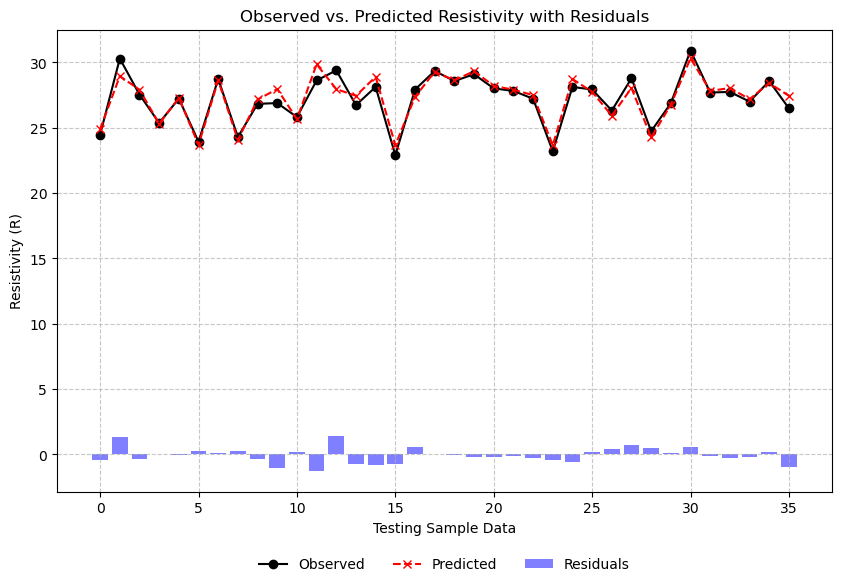

In [11]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.rcParams['figure.figsize'] = (10, 6)

# Generate x-axis values based on the length of the testing data
x_axis = range(len(x_test))

# Plotting the observed and predicted resistivity data with markers
plt.plot(x_axis, y_test, label='Observed', color='black', linestyle='-', marker='o')
plt.plot(x_axis, y_test_pred, label='Predicted', color='red', linestyle='--', marker='x')

# Calculate residuals (difference between observed and predicted values)
residuals = y_test - y_test_pred

# Plotting the residuals
plt.bar(x_axis, residuals, color='blue', alpha=0.5, label='Residuals')

# Set labels and title
plt.ylabel('Resistivity (R)')
plt.xlabel('Testing Sample Data')
plt.title('Observed vs. Predicted Resistivity with Residuals')

# Add a legend at the lower center without a frame
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=3, frameon=False)

# Display a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

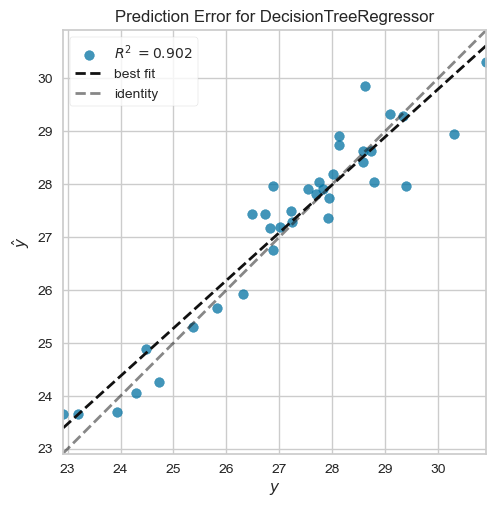

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
# plotting the prediciton errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(DTR)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.poof()

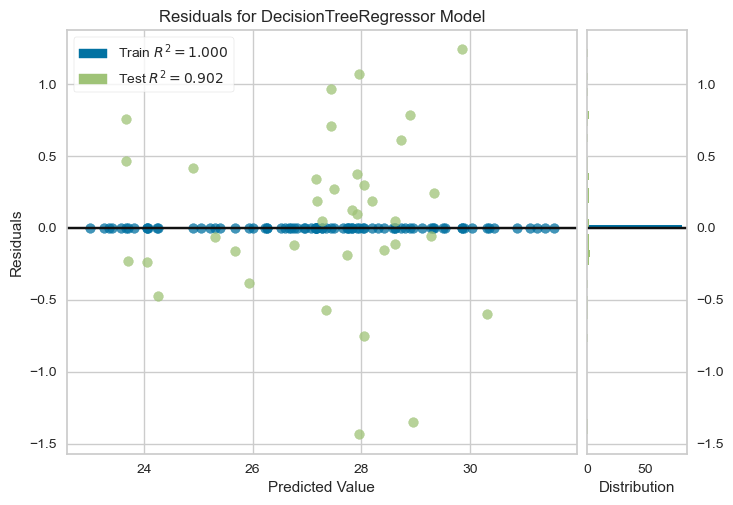

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
# plotting the residuals 
from yellowbrick.regressor import ResidualsPlot

# Create a ResidualsPlot instance with the Decision Tree Regressor
visualizer = ResidualsPlot(DTR)

# Fit the visualizer on the training data
visualizer.fit(x_train, y_train)

# Score the visualizer on the testing data
visualizer.score(x_test, y_test)

# Display the visualizer
visualizer.poof()


In [14]:
# The k-fold CV
from sklearn.model_selection import cross_val_score

In [15]:
seed = 7

In [16]:
# Traning model CV
score_train=cross_val_score(DTR, x_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

In [17]:
score_train

array([-0.32741184, -0.55760286, -0.92273966, -0.16323773, -0.23344683,
       -0.0402741 , -1.26066728, -0.08673967, -0.66625761, -0.87851404])

In [18]:
# Mean score
print(f"Means Score : {np.mean(score_train)}")
# Absolute Mean score
from numpy import absolute
print(f"Absolute Means score :{absolute(np.mean(score_train))}")

Means Score : -0.5136891620310724
Absolute Means score :0.5136891620310724


In [19]:
# The tesing model CV
score_test =cross_val_score(DTR,x_test,y_test,scoring = 'neg_mean_squared_error', cv=10)

In [20]:
score_test

array([-1.09171031, -7.86572741, -3.2701663 , -0.3030498 , -2.01962763,
       -1.6297669 , -0.24905094, -0.74052909, -5.6830868 , -0.27085552])

In [21]:
print(absolute(np.mean(score_test)))

2.3123570701556533


In [22]:
f_list =list(["Electric Field","Aging Temp","Testing Temp","Aging Days"])
f_importance =pd.Series(DTR.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

Aging Temp        0.429459
Aging Days        0.364701
Electric Field    0.113208
Testing Temp      0.092632
dtype: float64


In [23]:
from sklearn import metrics

# Make predictions using the Decision Tree Regressor
predictions = DTR.predict(x_test)

# Calculate absolute errors and percentage error
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)

# Calculate accuracy
accuracy = 100 - mape

# Display model performance metrics
print('Model Performance')
print("---------------------------------------")
print('Accuracy = {:0.4f}%.'.format(accuracy))
print('Mean Absolute Error = {:0.4f}'.format(np.mean(errors)))
print('R2 Score = {:0.4f}'.format(r2_score(y_test, predictions)))
print('Mean Squared Error = {:0.4f}'.format(mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error = {:0.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))


Model Performance
---------------------------------------
Accuracy = 98.3653%.
Mean Absolute Error = 0.4469
R2 Score = 0.9019
Mean Squared Error = 0.3428
Root Mean Squared Error = 0.5855
